## Using DNN module employing pre-trained model on caffe for face detection

In [1]:
##Importing the dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt

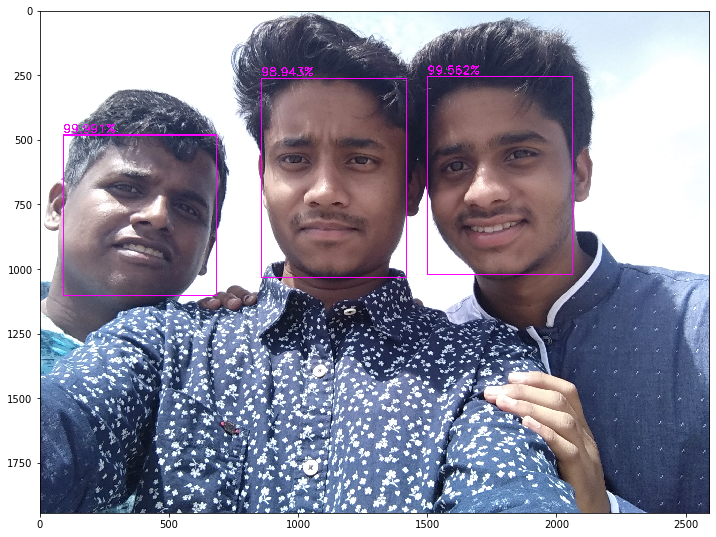

In [3]:
##Initializing the Caffe model
net = cv2.dnn.readNetFromCaffe("models/deploy.prototxt","models/res10_300x300_ssd_iter_140000_fp16.caffemodel")

##loading the image
img = cv2.imread('faces.jpg')

##getting blob from the image
blob = cv2.dnn.blobFromImage(img,1.0,(300,300),[104.0,177.0,123.0],False,False)
net.setInput(blob)

##Forward passing to the model for detections
detections = net.forward()
w = img.shape[1]
h = img.shape[0]

for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2]
    
    if confidence > 0.7:   ##only select detections based on threshold
        box = detections[0,0,i,3:7] * np.array([w,h,w,h])
        (startx,starty,endx,endy) = box.astype('int')
        cv2.rectangle(img,(startx,starty),(endx,endy),(255,0,255),3)
        text = f'{(confidence*100):.3f}%'
        y = starty - 10 if starty > 5 else starty + 10
        cv2.putText(img,text,(startx,y),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,0,255),3)
plt.figure(figsize=(12,10))
plt.imshow(img[:,:,::-1])
plt.show()

## Using tensorflow model for face detection

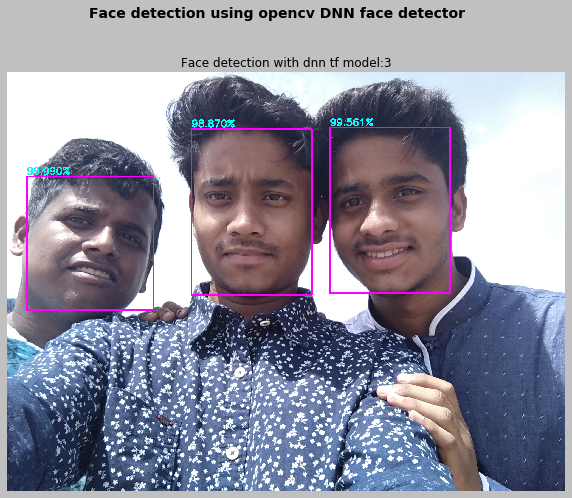

In [6]:
##initializing the tensorflow model
net = cv2.dnn.readNetFromTensorflow("models/opencv_face_detector_uint8.pb","models/opencv_face_detector.pbtxt")

##loading the image
img = cv2.imread('faces.jpg')

##getting blob from the image
blob = cv2.dnn.blobFromImage(img,1.0,(300,300),[104.0,177.0,123.0],False,False)
net.setInput(blob)

##forward pass to the model
detections = net.forward()
w = img.shape[1]
h = img.shape[0]
detected_faces = 0

for i in range(0,detections.shape[2]):
    confidence = detections[0,0,i,2]
    
    if confidence > 0.7:  ##threshold for detections
        detected_faces +=1
        box = detections[0,0,i,3:7] * np.array([w,h,w,h])
        (startx,starty,endx,endy) = box.astype('int')
        text = f'{(confidence*100):.3f}%'
        y = starty - 10 if starty >5 else starty +10
        cv2.rectangle(img,(startx,starty),(endx,endy),(255,0,255),6)
        cv2.putText(img,text,(startx,y),cv2.FONT_HERSHEY_SIMPLEX,1.5,(255,255,0),5)
        
fig = plt.figure(figsize=(10,8))
plt.suptitle("Face detection using opencv DNN face detector", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')
show_with_matplotlib(img,'Face detection with dnn tf model:'+str(detected_faces),1)
plt.show()

In [5]:
def show_with_matplotlib(img,title,pos):
    
    img = img[:,:,::-1]
    ax = plt.subplot(1,1,pos)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

## Implementation on video

In [8]:
import cv2
import numpy as np



net = cv2.dnn.readNetFromCaffe("models/deploy.prototxt","models/res10_300x300_ssd_iter_140000_fp16.caffemodel")
detected_faces = 0
vs = cv2.VideoCapture(0)

while True:
    
    ret,frame = vs.read()
    
    if not ret:
        break
        
    w = frame.shape[1]
    h = frame.shape[0]
    blob = cv2.dnn.blobFromImage(frame,1.0,(300,300),[104.0, 177.0, 123.0],False,False)
    net.setInput(blob)
    detections = net.forward()


    for i in range(0,detections.shape[2]):
    #get the confidence(probablity) of object
        confidence = detections[0,0,i,2]
    
    #only consider those which have confidence greater than the threshold
        if confidence > 0.7:
            detected_faces +=1
        
        #get the co-ordinates of the current detection
            box = detections[0,0,i,3:7] * np.array([w,h,w,h])
        
        #unpack the co-ordinates
            startx,starty,endx,endy = box.astype('int')
            cv2.rectangle(frame,(startx,starty),(endx,endy),(0,255,0),2)
            text = f"{(confidence*100):.3f}%"
            y = starty - 10 if starty> 10 else starty +10
            cv2.putText(frame,text,(startx,y),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),2)
            cv2.imshow('Frame',frame)
            
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
            
            
vs.release()
cv2.destroyAllWindows()

In [10]:
!__opencv__version()

'__opencv__version' is not recognized as an internal or external command,
operable program or batch file.
